In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import load_model

In [3]:
model=load_model('./models/object_detection.h5')
print("model sucessfully loaded")

model sucessfully loaded


In [6]:
path="./images/N99.jpeg"
image = load_img(path)
image = np.array(image,dtype=np.uint8)
image1 = load_img(path , target_size=(224,224))
image_arr_224=img_to_array(image1)/255.0

In [7]:
h,w,d=image.shape
print("Height of image is :" ,h)
print("Width of the image is :", w)

Height of image is : 354
Width of the image is : 474


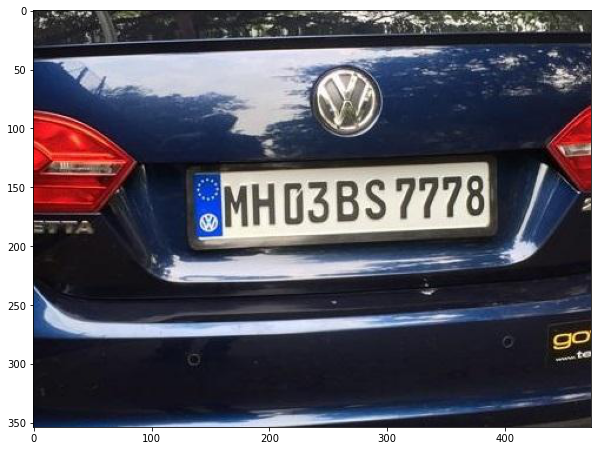

In [8]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [9]:
image_arr_224.shape

(224, 224, 3)

In [10]:
test_arr=image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [11]:
coords=model.predict(test_arr)
coords

1/1 [==============================] - 3s 3s/step


array([[0.33009025, 0.83323854, 0.3850568 , 0.54774183]], dtype=float32)

In [12]:
# denormalize the values 
denorm = np.array([w,w,h,h])
coords=coords*denorm
coords

array([[156.46278065, 394.95506895, 136.31010497, 193.90060794]])

In [13]:
coords=coords.astype(np.int32)

(156, 136) (394, 193)


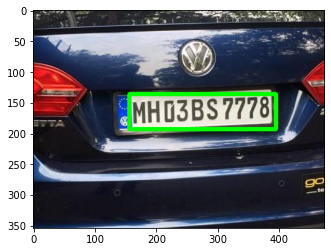

In [14]:
xmin,xmax,ymin,ymax=coords[0]
pt1=(xmin,ymin)
pt2=(xmax,ymax)
print(pt1,pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),5)
plt.imshow(image)
plt.show()

In [15]:
# creating a pipline

def object_detection(path):
    # read image 
    image = load_img(path)
    image = np.array(image,dtype=np.uint8)
    image1 = load_img(path , target_size=(224,224))
    # normalize the image 
    image_arr_224=img_to_array(image1)/255.0
    h,w,d=image.shape
    test_arr=image_arr_224.reshape(1,224,224,3)
    #make prediction
    coords=model.predict(test_arr)
    # denormalize the values 
    denorm = np.array([w,w,h,h])
    coords=coords*denorm
    coords=coords.astype(np.int32)
    xmin,xmax,ymin,ymax=coords[0]
    pt1=(xmin,ymin)
    pt2=(xmax,ymax)
    print(pt1,pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),5)
    return image,coords

1/1 [==============================] - 0s 157ms/step
(229, 191) (366, 217)


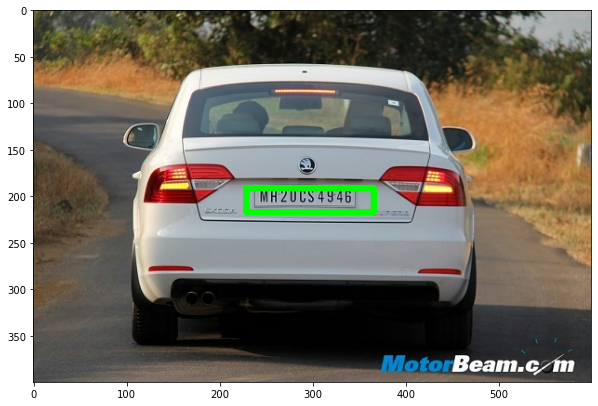

In [36]:
path="./images/N91.jpeg"
image ,coords=object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [37]:
coords

array([[229, 366, 191, 217]])

In [38]:
import pytesseract as pt

In [39]:
path="./images/N91.jpeg"
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = coords[0]
roi = img[ymin:ymax,xmin:xmax]


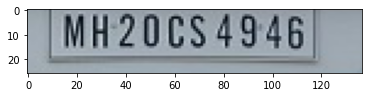

In [40]:
plt.imshow(roi)
plt.show()

In [41]:
# extract text from image
text = pt.image_to_string(roi)
print(text)

(MH20CS 4946)

